## Random Forest

### Problem 2 : Using Random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Import librabies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import data

In [3]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [4]:
# Checking data basic info
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
# Checking any duplicated values
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


### Label encoding

In [8]:
from  sklearn.preprocessing import LabelEncoder

In [13]:
LB=LabelEncoder()
fraud["Undergrad"]=LB.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"]=LB.fit_transform(fraud["Marital.Status"])
fraud["Urban"]=LB.fit_transform(fraud["Urban"])

In [14]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [15]:
## To check amoung the income which are highly succesptable to riskier accounts by taking the average taxable income 30000 as a priority
fraud["Taxable.Income"]=(fraud["Taxable.Income"]>30000)*1

In [17]:
## Splitting the dependent and target variables from the dataset
x=fraud.drop(columns="Taxable.Income")
y=fraud["Taxable.Income"]

In [19]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [22]:
y.value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

### Spliting train data and test data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model= RandomForestClassifier(n_estimators=110,max_features=3)

In [30]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

### Model prediction - train data

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
y_train_pred=model.predict(x_train)

In [33]:
print("Accuracy_score:", accuracy_score(y_train,y_train_pred))

Accuracy_score: 1.0


### Train accuracy

In [34]:
model.score(x_train,y_train)

1.0

## Model prediction - test data

In [35]:
y_test_pred=model.predict(x_test)

In [36]:
print("Accuracy :", accuracy_score(y_test,y_test_pred))

Accuracy : 0.7555555555555555


## Test accuracy

In [38]:
model.score(x_test,y_test)

0.7555555555555555

## Checking the important features amoung the data

In [40]:
features_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
features_imp

City.Population    0.526676
Work.Experience    0.281215
Marital.Status     0.087179
Urban              0.054720
Undergrad          0.050210
dtype: float64

### Visualization of important features

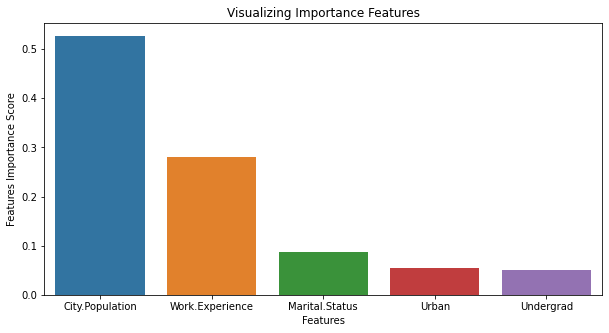

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x=features_imp.index,y=features_imp)
plt.xlabel("Features")
plt.ylabel("Features Importance Score")
plt.title("Visualizing Importance Features")
plt.show()

### Checking Model with different maximum features using loop function

In [45]:
train_accuracy=[]
test_accuracy=[]
for i in range(1,10):
    model2=RandomForestClassifier(n_estimators=110,max_features=3)
    model2.fit(x_train,y_train)
    train_accuracy.append(model2.score(x_train,y_train))
    test_accuracy.append(model2.score(x_test,y_test))

## Plotting the training and testing accuracy with different maximum features

In [46]:
data=pd.DataFrame({"Max_Features":range(1,10),"Train_ACC":train_accuracy,"Test_ACC":test_accuracy})
data

,Max_Features,Train_ACC,Test_ACC
0,1,1.0,0.750000
1,2,1.0,0.744444
2,3,1.0,0.738889
3,4,1.0,0.738889
4,5,1.0,0.750000
5,6,1.0,0.738889
6,7,1.0,0.738889
7,8,1.0,0.744444
8,9,1.0,0.755556


## Visualization

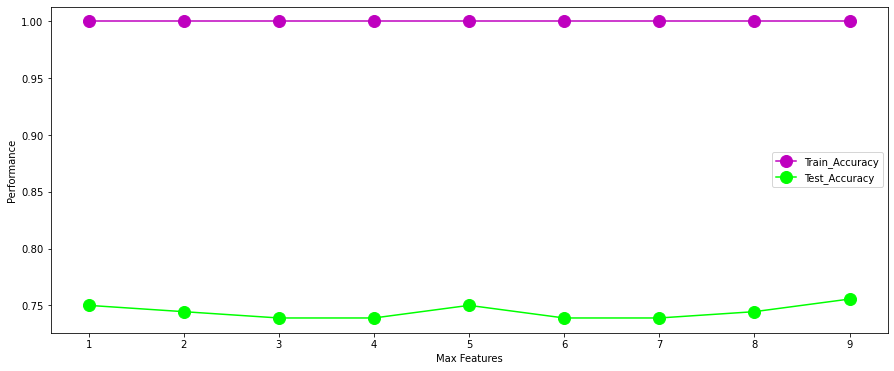

In [47]:
labels=["Train_Accuracy","Test_Accuracy"]
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot()
plt.plot(data["Max_Features"],data["Train_ACC"],marker="o",markersize=12,color="m")
plt.plot(data["Max_Features"],data["Test_ACC"],marker="o",markersize=12,color="lime")
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel("Max Features")
plt.ylabel("Performance")
plt.show()

## Confusion matrix using visualization

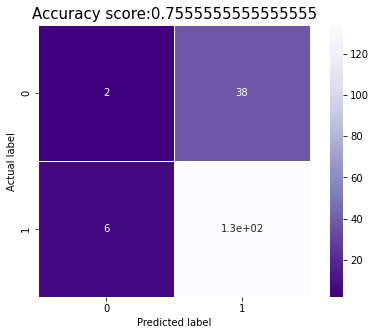

In [54]:
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap="Purples_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_tittle='Accuracy score:{0}'.format(model.score(x_test,y_test))
plt.title(all_sample_tittle,size=15)
plt.show()

### Classification Report for the test data

In [55]:
print("Classification report - \n", classification_report(y_test,y_test_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.25      0.05      0.08        40
           1       0.78      0.96      0.86       140

    accuracy                           0.76       180
   macro avg       0.51      0.50      0.47       180
weighted avg       0.66      0.76      0.69       180



### Kfold validation for model validation

In [56]:
from sklearn.model_selection import KFold,cross_val_score

In [60]:
kfold=KFold(n_splits=8,random_state=7,shuffle=True)

In [63]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.74


# Adaboost Classifier - To check the fraud check using k fold 

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
n_tree=10
seed=7
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
model3=AdaBoostClassifier(n_estimators=n_tree,random_state=seed)

## Checking the accuracy in Adaboost

In [69]:
results=cross_val_score(model3,x,y,cv=kfold)
print(result.mean())

0.74


## checking the accuracy in train test split

In [70]:
model3.fit(x_train,y_train)
print("Accuracy :",model3.score(x_train,y_train))

Accuracy : 0.7976190476190477


## Model prediction - test data

In [71]:
y_test_pred2=model3.predict(x_test)

In [75]:
print("Accuracy :",accuracy_score(y_test,y_test_pred2))

Accuracy : 0.7777777777777778


In [76]:
model3.score(x_test,y_test)

0.7777777777777778

## Listing the accuracy of training and testing

In [77]:
data

,Max_Features,Train_ACC,Test_ACC
0,1,1.0,0.750000
1,2,1.0,0.744444
2,3,1.0,0.738889
3,4,1.0,0.738889
4,5,1.0,0.750000
5,6,1.0,0.738889
6,7,1.0,0.738889
7,8,1.0,0.744444
8,9,1.0,0.755556


## ======================================================================================